# Diabetic detection using ANN

In [27]:
from numpy import loadtxt
import tensorflow 
import pandas as pd
import seaborn as sns


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import model_from_json

In [11]:
dataset=pd.read_csv("pima-indians-diabetes.csv",names=["No of times pregnant","Plasma glucose conc","Diastolic bp",
"Triceps skin fold thickness",
   "serum insulin" ,
 "BMI",
"Diabetes pedigree ",
"Age",
 "Class"])

In [ ]:
'''
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
'''

In [12]:
dataset

,No of times pregnant,Plasma glucose conc,Diastolic bp,Triceps skin fold thickness,serum insulin,BMI,Diabetes pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


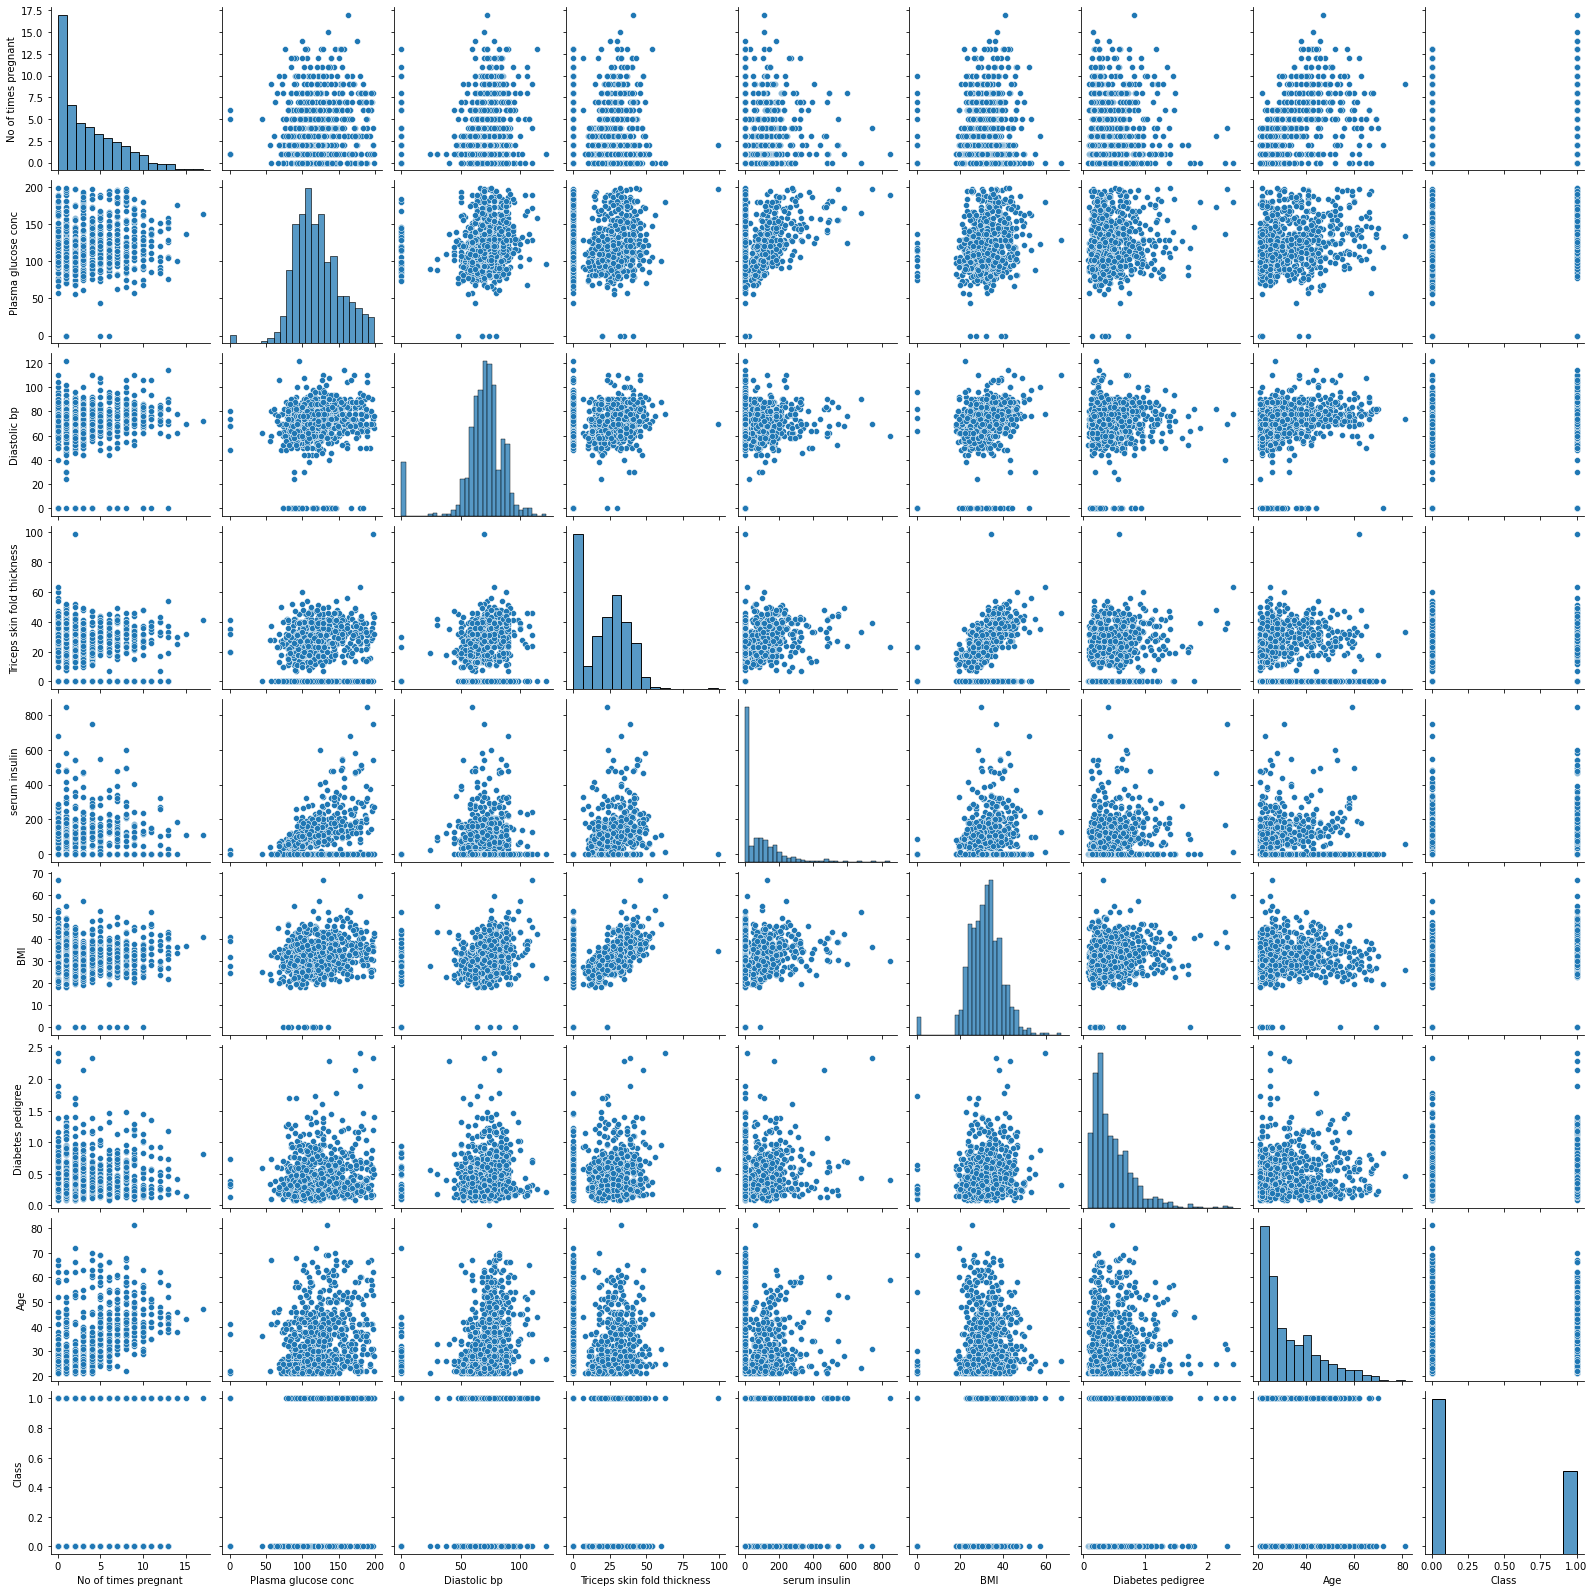

In [15]:
sns.pairplot(dataset)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   No of times pregnant         768 non-null    int64  
 1   Plasma glucose conc          768 non-null    int64  
 2   Diastolic bp                 768 non-null    int64  
 3   Triceps skin fold thickness  768 non-null    int64  
 4   serum insulin                768 non-null    int64  
 5   BMI                          768 non-null    float64
 6   Diabetes pedigree            768 non-null    float64
 7   Age                          768 non-null    int64  
 8   Class                        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
dataset.describe()

,No of times pregnant,Plasma glucose conc,Diastolic bp,Triceps skin fold thickness,serum insulin,BMI,Diabetes pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Splitting data

In [21]:
train_x=dataset.iloc[:,0:8]

In [23]:
train_y=dataset["Class"]

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2)

# ANN model

In [82]:
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [83]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_56 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_58 (Dense)             (None, 12)                396       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 13        
Total params: 11,897
Trainable params: 11,897
Non-trainable params: 0
_________________________________________________

In [84]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train=model.fit(x_train, y_train, epochs=120, batch_size=32)

Epoch 1/120
20/20 [==============================] - 0s 6ms/step - loss: 4.1569 - accuracy: 0.4873
Epoch 2/120
20/20 [==============================] - 0s 6ms/step - loss: 1.0917 - accuracy: 0.6011
Epoch 3/120
20/20 [==============================] - 0s 6ms/step - loss: 0.9824 - accuracy: 0.5961
Epoch 4/120
20/20 [==============================] - 0s 6ms/step - loss: 0.9113 - accuracy: 0.5918
Epoch 5/120
20/20 [==============================] - 0s 6ms/step - loss: 0.8060 - accuracy: 0.6100
Epoch 6/120
20/20 [==============================] - 0s 6ms/step - loss: 0.7199 - accuracy: 0.6476
Epoch 7/120
20/20 [==============================] - 0s 6ms/step - loss: 0.7020 - accuracy: 0.6463
Epoch 8/120
20/20 [==============================] - 0s 6ms/step - loss: 0.7196 - accuracy: 0.6201
Epoch 9/120
20/20 [==============================] - 0s 6ms/step - loss: 0.6713 - accuracy: 0.6262
Epoch 10/120
20/20 [==============================] - 0s 6ms/step - loss: 0.6553 - accuracy: 0.6293
Epoch 11/

20/20 [==============================] - 0s 6ms/step - loss: 0.5244 - accuracy: 0.7402
Epoch 84/120
20/20 [==============================] - 0s 5ms/step - loss: 0.5326 - accuracy: 0.7029
Epoch 85/120
20/20 [==============================] - 0s 6ms/step - loss: 0.5196 - accuracy: 0.7781
Epoch 86/120
20/20 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.7475
Epoch 87/120
20/20 [==============================] - 0s 5ms/step - loss: 0.5358 - accuracy: 0.7452
Epoch 88/120
20/20 [==============================] - 0s 5ms/step - loss: 0.5201 - accuracy: 0.7481
Epoch 89/120
20/20 [==============================] - 0s 5ms/step - loss: 0.5545 - accuracy: 0.7215
Epoch 90/120
20/20 [==============================] - 0s 5ms/step - loss: 0.5236 - accuracy: 0.7473
Epoch 91/120
20/20 [==============================] - 0s 7ms/step - loss: 0.5332 - accuracy: 0.7188
Epoch 92/120
20/20 [==============================] - 0s 6ms/step - loss: 0.5293 - accuracy: 0.7672
Epoch 93/120


In [85]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 5ms/step - loss: 0.5692 - accuracy: 0.7338
Accuracy: 73.38


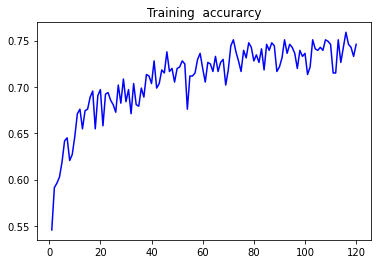

In [87]:
import matplotlib.pyplot as plt
acc = train.history['accuracy']
# val_acc = train.history['val_accuracy']
loss = train.history['loss']
# val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
# plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training  accurarcy')
plt.show()